In [13]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent.parent

sys.path.append(str(ROOT_DIR))
print("Ruta añadida al sys.path:", ROOT_DIR)

Ruta añadida al sys.path: c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Mercado Libre


In [14]:
# Obtener la ruta de los datos
from src.features.balanceo import preprocess_data, split_data
from src.config import DATA_PATH
import pandas as pd

In [15]:
DATA_PATH_ = ROOT_DIR / DATA_PATH
df = pd.read_csv(DATA_PATH_)

# Estructura 
print("🔍 Dimensiones:", df.shape)
print("\n🧱 Tipos de datos:\n", df.dtypes)

# Primeras filas
print("\n👀 Primeras filas:")
display(df.head())

# Revisión de nulos
print("\n🚨 Nulos por columna:\n", df.isnull().sum())

# Duplicados
print("\n📎 Registros duplicados:", df.duplicated().sum())

🔍 Dimensiones: (100000, 26)

🧱 Tipos de datos:
 id                         object
title                      object
date_created               object
base_price                float64
price                     float64
category_id                object
tags                       object
attributes                 object
variations                 object
pictures                   object
seller_id                  object
seller_country             object
seller_province            object
seller_city                object
seller_loyalty             object
buying_mode                object
shipping_mode              object
shipping_admits_pickup     object
shipping_is_free           object
status                     object
sub_status                 object
warranty                   object
is_new                      int64
initial_quantity          float64
sold_quantity             float64
available_quantity        float64
dtype: object

👀 Primeras filas:


C:\Users\aleja\AppData\Local\Temp\ipykernel_21220\1398371809.py:2: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH_)


,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA578569012,Escritorio Secretter Espectacular,2015-09-08T21:17:57.000Z,6700.0,6700.0,MLA1902,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,custom,True,False,active,NaN,NaN,0,1.0,0.0,1.0
1,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29T12:55:03.000Z,119.0,119.0,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,Sí,1,19.0,0.0,19.0
2,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23T12:41:07.000Z,450.0,450.0,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",...,me2,False,False,active,NaN,Sí,1,2.0,0.0,2.0
3,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16T13:34:01.000Z,40.0,40.0,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,me2,True,False,active,NaN,Sí,0,1.0,0.0,1.0
4,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25T14:42:20.000Z,30.0,30.0,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0



🚨 Nulos por columna:
 id                            4
title                         4
date_created                  4
base_price                    4
price                         8
category_id                   4
tags                          4
attributes                    4
variations                    4
pictures                      4
seller_id                     4
seller_country                7
seller_province               7
seller_city                   8
seller_loyalty                4
buying_mode                   4
shipping_mode                 4
shipping_admits_pickup        4
shipping_is_free              4
status                        4
sub_status                99014
warranty                  60894
is_new                        0
initial_quantity              4
sold_quantity                 4
available_quantity            4
dtype: int64

📎 Registros duplicados: 0


In [8]:
# Valores únicos por columna
print("\n🔢 Valores únicos por columna:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} valores únicos")


🔢 Valores únicos por columna:
- id: 99996 valores únicos
- title: 98816 valores únicos
- date_created: 87072 valores únicos
- base_price: 10331 valores únicos
- price: 10330 valores únicos
- category_id: 10911 valores únicos
- tags: 12 valores únicos
- attributes: 3454 valores únicos
- variations: 8193 valores únicos
- pictures: 98152 valores únicos
- seller_id: 43380 valores únicos
- seller_country: 3 valores únicos
- seller_province: 26 valores únicos
- seller_city: 3655 valores únicos
- seller_loyalty: 11 valores únicos
- buying_mode: 4 valores únicos
- shipping_mode: 6 valores únicos
- shipping_admits_pickup: 5 valores únicos
- shipping_is_free: 6 valores únicos
- status: 5 valores únicos
- sub_status: 3 valores únicos
- warranty: 10264 valores únicos
- is_new: 2 valores únicos
- initial_quantity: 451 valores únicos
- sold_quantity: 317 valores únicos
- available_quantity: 470 valores únicos


In [9]:
num_cols = df.select_dtypes(include="number").columns

print("\n📊 Estadísticas de variables numéricas:")
display(df[num_cols].describe().T)



📊 Estadísticas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
base_price,99996.0,55067.927890,8.632656e+06,0.840000,90.0,250.0,800.0,2.222222e+09
price,99992.0,52528.456969,8.623472e+06,0.840000,90.0,250.0,800.0,2.222222e+09
is_new,100000.0,0.537530,4.985920e-01,0.000000,0.0,1.0,1.0,1.000000e+00
initial_quantity,99996.0,35.093704,4.210845e+02,0.000000,1.0,1.0,2.0,9.999000e+03
sold_quantity,99996.0,2.397116,4.268593e+01,0.000000,0.0,0.0,0.0,8.676000e+03
available_quantity,99996.0,34.840368,4.208171e+02,-58.422839,1.0,1.0,2.0,9.999000e+03


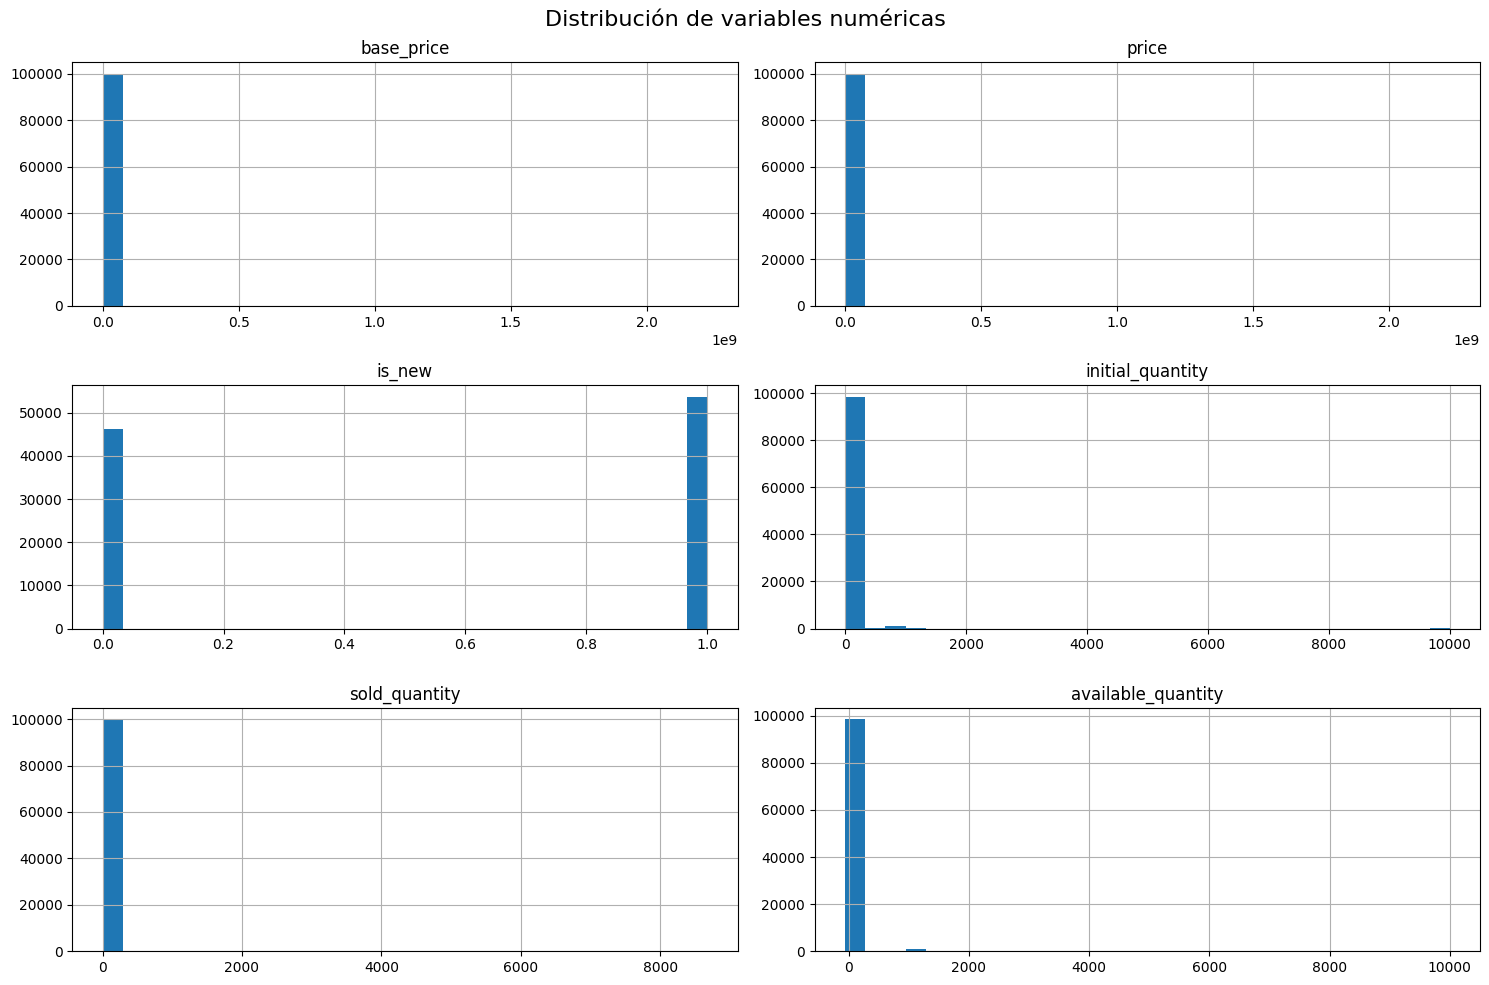

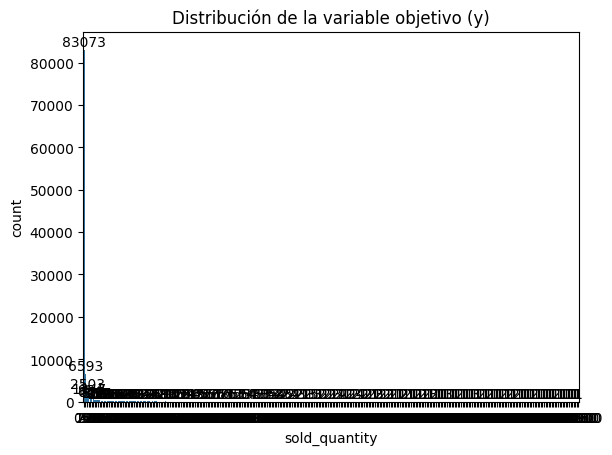

In [11]:
# Histograma de numéricas
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Conteo de la variable objetivo
ax = sns.countplot(data=df, x='sold_quantity')
plt.title("Distribución de la variable objetivo (y)")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',                # El texto que se muestra
                (p.get_x() + p.get_width() / 2., count),  # Posición (centro de la barra, altura)
                ha='center', va='bottom',   # Alineación horizontal y vertical
                fontsize=10, color='black')

plt.show()


In [12]:
# Detectar columnas categóricas
cat_cols = df.select_dtypes(include="object").columns

# Mostrar el conteo absoluto y relativo por cada categoría
for col in cat_cols:
    print(f"\n📌 {col.upper()} - {df[col].nunique()} categorías únicas")
    print("Conteo absoluto:")
    print(df[col].value_counts())
    print("\nPorcentaje relativo (%):")
    print((df[col].value_counts(normalize=True) * 100).round(2))



📌 ID - 99996 categorías únicas
Conteo absoluto:
id
MLA578569012    1
MLA576883746    1
MLA581002506    1
MLA574707083    1
MLA576209717    1
               ..
MLA579464055    1
MLA578257287    1
MLA581361773    1
MLA576082728    1
MLA582542755    1
Name: count, Length: 99996, dtype: int64

Porcentaje relativo (%):
id
MLA578569012    0.0
MLA576883746    0.0
MLA581002506    0.0
MLA574707083    0.0
MLA576209717    0.0
               ... 
MLA579464055    0.0
MLA578257287    0.0
MLA581361773    0.0
MLA576082728    0.0
MLA582542755    0.0
Name: proportion, Length: 99996, dtype: float64

📌 TITLE - 98816 categorías únicas
Conteo absoluto:
title
50 Suspensores Para Short De Baño Tela Calada                   78
50 Suspensores Para Short De Baño Nido De Abeja                 47
Confeccion Short De Baño Bermudas Hombre Y Niño                 34
50 Suspensores Para Short De Baño Tela Nido De Abeja            31
12 Suspensores Para Short De Baño Tela Calada                   31
                   

In [4]:
import pandas as pd
df_features = pd.read_csv(r"C:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Mercado Libre\data\processed\df_features.csv")


In [9]:
df_features["category_id"].value_counts()

category_id
otra_categoria    79435
MLA1227            4504
MLA2044            1890
MLA41287            912
MLA3530             754
MLA2038             645
MLA15171            576
MLA15328            464
MLA1383             450
MLA41269            440
MLA15204            430
MLA3361             422
MLA2032             417
MLA85960            381
MLA41064            368
MLA6651             347
MLA1963             329
MLA41185            328
MLA119287           319
MLA60611            314
MLA3936             307
MLA4335             290
MLA41260            290
MLA26536            284
MLA41174            284
MLA15226            279
MLA41083            278
MLA1207             259
MLA5496             257
MLA352293           253
MLA11456            248
MLA1914             246
MLA1902             238
MLA40497            237
MLA1635             226
MLA2039             218
MLA1474             212
MLA6009             211
MLA41173            211
MLA2042             210
MLA15197            208
MLA4